# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [19]:
sex_ct = pd.crosstab(df['sex'], df['flag_doente'], margins = True)
sex_ct.rename(columns={0: "saudavel", 1: "doente"}, inplace=True)
sex_ct.rename(index={0: 'Masc', 1:'Fem', 'All': 'Todos'}, inplace=True)

sex_ct['media_doente'] = sex_ct['All']/sex_ct['doente']
sex_ct['odds'] = sex_ct['doente']/sex_ct['saudavel']
sex_ct['OR_vs_total'] = sex_ct['odds']/sex_ct.loc['Todos', 'odds']
sex_ct['Logito'] = np.log(sex_ct['odds'])
sex_ct['WOE'] = np.log(sex_ct['OR_vs_total'])

heart_ct

flag_doente,saudavel,doente,All,media_doente,odds,OR_vs_total,Logito,WOE
sex,,,,,,,,
Masc,72,25,97,3.880000,0.347222,0.409672,-1.057790,-0.892398
Fem,92,114,206,1.807018,1.239130,1.461996,0.214410,0.379802
Todos,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [105]:
df['faixa_etaria']  = pd.cut(df['age'], 5, duplicates='drop')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,faixa_etaria
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(57.8, 67.4]"
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(57.8, 67.4]"
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(57.8, 67.4]"
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.952, 38.6]"
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(38.6, 48.2]"


In [206]:
age_ct = pd.crosstab(df['faixa_etaria'], df['flag_doente'], margins = True)
age_ct.rename(columns={0: "saudavel", 1: "doente"}, inplace=True)

age_ct['media_doente'] = age_ct['All']/age_ct['doente']
age_ct['odds'] = age_ct['doente']/age_ct['saudavel']
age_ct['OR_vs_total'] = age_ct['odds']/age_ct.loc['All', 'odds']
age_ct['Logito'] = np.log(age_ct['odds'])
age_ct['WOE'] = np.log(age_ct['OR_vs_total'])

faixas_validas = age_ct.index[age_ct.index != 'All']
age_ct.loc[faixas_validas, 'idade_media'] = faixas_validas.map(lambda intervalo: (intervalo.left + intervalo.right) / 2)

media_idade = age_ct['idade_media'].mean()
age_ct.loc['All', 'idade_media'] = media_idade

In [208]:
# Separa os dados sem a linha 'All'
age_ct_sem_all = age_ct.drop(index='All')

# Arredonda os limites do índice (que são intervalos)
new_intervals = pd.IntervalIndex.from_tuples(
    [(round(interval.left, 2), round(interval.right, 2)) for interval in age_ct_sem_all.index]
)

# Atualiza o índice do DataFrame sem o 'All'
age_ct_sem_all.index = new_intervals

# Pega a linha 'All' separadamente
linha_all = age_ct.loc[['All']]

# Junta de volta com índice original (linha 'All')
age_ct = pd.concat([age_ct_sem_all, linha_all])

In [210]:
age_ct

flag_doente,saudavel,doente,All,media_doente,odds,OR_vs_total,Logito,WOE,idade_media
"(28.95, 38.6]",8,3,11,3.666667,0.375000,0.442446,-0.980829,-0.815437,33.7760
"(38.6, 48.2]",50,21,71,3.380952,0.420000,0.495540,-0.867501,-0.702108,43.4000
"(48.2, 57.8]",56,41,97,2.365854,0.732143,0.863823,-0.311780,-0.146387,53.0000
"(57.8, 67.4]",40,67,107,1.597015,1.675000,1.976259,0.515813,0.681206,62.6000
"(67.4, 77.0]",10,7,17,2.428571,0.700000,0.825899,-0.356675,-0.191282,72.2000
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000,52.9952


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

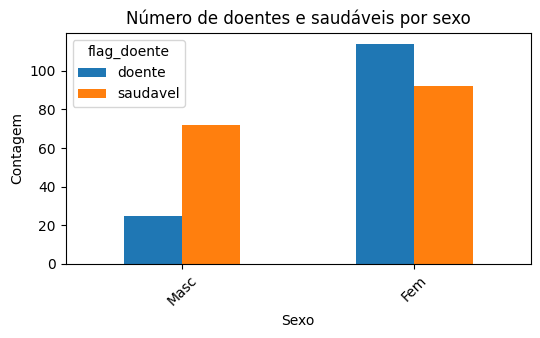

In [214]:
df_plot = sex_ct[['doente', 'saudavel']].drop('Todos')  # exclui linha total 'All'

df_plot.plot(kind='bar', figsize=(6,3))
plt.title('Número de doentes e saudáveis por sexo')
plt.ylabel('Contagem')
plt.xlabel('Sexo')
plt.xticks(rotation=45)
plt.show()

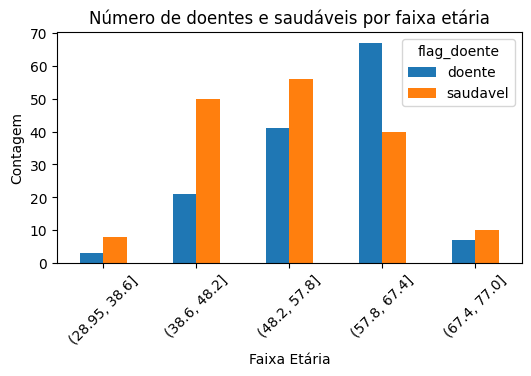

In [212]:
df_plot = age_ct[['doente', 'saudavel']].drop('All')  # exclui linha total 'All'

df_plot.plot(kind='bar', figsize=(6,3))
plt.title('Número de doentes e saudáveis por faixa etária')
plt.ylabel('Contagem')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.show()